# Trabalho Final Machine Learning - Classificação de porte ou não de doença cardíaca

## Aluno: Carlos Henrique Pinheiro Cordeiro

---

### O trabalho consiste em utilizar três técnicas de aprendizado de máquina, para classificar se um paciente possui ou não uma doença cardíaca. As técnicas escolhidas foram KNN, Random Forest e SVM (Support Vector Machines).
#### Link para download do dataset utilizado: https://archive.ics.uci.edu/dataset/45/heart+disease

---

### Primeiramente deve se estabelecer uma base para as três técnicas. Consistindo em resgatar os dados desejados, para que seja realizado um pré-processamento
### Iniciando pelo resgate dos dados para um dataframe do Pandas

In [23]:
import pandas as pd
import numpy as np
aColunas = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "target"]

aCleveland = pd.read_csv("dataset/processed.cleveland.data"  , names=aColunas)
aHungria   = pd.read_csv("dataset/processed.hungarian.data"  , names=aColunas)
aSuica     = pd.read_csv("dataset/processed.switzerland.data", names=aColunas)

aCleveland['origem'] = 1
aHungria['origem']   = 2
aSuica['origem']     = 3


aDfDados = pd.concat([aCleveland, aHungria, aSuica], ignore_index=True)

---

### Significado das colunas:

1. **age:** Idade do paciente em anos.
2. **sex:** Sexo do paciente (0 = Feminino, 1 = Masculino).
3. **cp:** Tipo de dor no peito (chest pain type):
   - 0: Angina típica
   - 1: Angina atípica
   - 2: Dor não anginosa
   - 3: Assintomático


4. **trestbps:** Pressão arterial em repouso (em mm Hg).
5. **chol:** Colesterol sérico em mg/dl.
6. **fbs:** Açúcar no sangue em jejum > 120 mg/dl (1 = verdadeiro; 0 = falso).
7. **restecg:** Resultados eletrocardiográficos em repouso:
   - 0: Normal
   - 1: Anormalidades de ST-T (inversões de onda T e elevação ou depressão de > 0.05 mV)
   - 2: Hipertrofia ventricular esquerda provável ou definitiva


8. **thalach:** Frequência cardíaca máxima alcançada.
9. **exang:** Angina induzida pelo exercício (1 = sim; 0 = não).
10. **oldpeak:** Depressão do segmento ST induzida pelo exercício em relação ao repouso.
11. **slope:** A inclinação do segmento ST de pico do exercício:
    - 0: Descendente
    - 1: Plano
    - 2: Ascendente


12. **ca:** Número de vasos principais coloridos por fluoroscopia (0-3).
13. **thal:** Tipo de thalassemia:
    - 0: Normal
    - 1: Defeito fixo
    - 2: Defeito reversível


14. **target:** Presença de doença cardíaca (0 = Não, Outros valores (determinado para este contexto) = Sim).

---

### Agora, se tem o pré-processamento dos dados, limpando valores nulos e realizando separações dos conjuntos de teste e treinamento.
### As classes a serem previstas, inicialmente no dataset vão de 0 a 4. Onde 0 classifica o paciente como livre de doença cardíaca, e os outros o classificam como portador de doença cardíaca porém com níveis diferentes. Aqui para este caso serão definidas somente duas classes, 0 e 1, sendo "Não possui" ou "Possui"

In [24]:
from sklearn.model_selection import train_test_split
aDfDados = aDfDados.dropna()

#Definição das classes binárias
aDfDados['target'] = aDfDados['target'].apply(lambda x: 0 if x == 0 else 1)
aX = aDfDados.drop("target", axis=1)

aX.replace('?', np.nan, inplace=True)
aX = aX.astype(float)
aX.fillna(aX.mean(), inplace=True)
aY = aDfDados["target"]

xTreinamento, xTeste, yTreinamento, yTeste = train_test_split(aX, aY, test_size=0.2, random_state=42)

### Etapa de padronização/normalização dos dados, para modelos que necessitam deste tratamento, como neste caso KNN e SVM

In [25]:
from sklearn.preprocessing import StandardScaler

oScaler                 = StandardScaler()
xTreinamentoNormalizado = oScaler.fit_transform(xTreinamento)
xTesteNormalizado       = oScaler.transform(xTeste)

### A partir daqui, com a base estabelecida (dados obtidos e limpos) pode-se dar início a etapa de testes com os três modelos selecionados: KNN, Random Forest e SVM

---------------------------------------------------------

# KNN

### Criação do modelo KNN para o melhor K definido de forma iterativa

O melhor K definido é: 0.8680555555555556, tendo como K = 20
0.8680555555555556


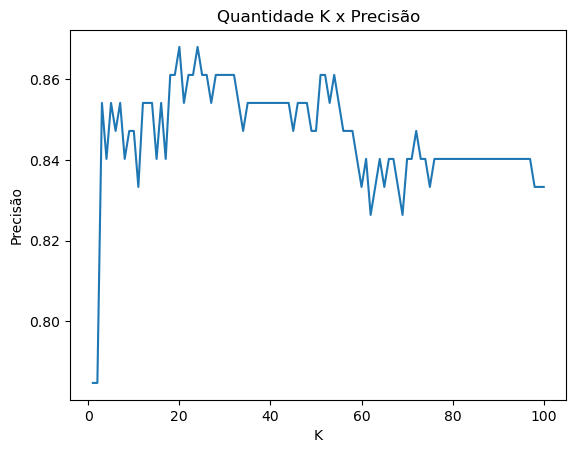

In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
 
aValoresK = np.array([]);
for k in range(1, 101):
    aValoresK = np.append(aValoresK, [KNeighborsClassifier(n_neighbors=k).fit(xTreinamentoNormalizado, yTreinamento).score(xTesteNormalizado, yTeste)])

print("O melhor K definido é: "+str(aValoresK.max())+", tendo como K = "+str(aValoresK.argmax()+1))

oModeloKnn = KNeighborsClassifier(n_neighbors=aValoresK.argmax()+1);
oModeloKnn.fit(xTreinamentoNormalizado, yTreinamento)
print(oModeloKnn.score(xTesteNormalizado, yTeste))

plt.plot(np.arange(1, 101), aValoresK)

plt.xlabel('K')
plt.ylabel('Precisão')
plt.title('Quantidade K x Precisão')

plt.show()


### Avaliação do modelo KNN


Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.82      0.93      0.87        71
           1       0.92      0.81      0.86        73

    accuracy                           0.87       144
   macro avg       0.87      0.87      0.87       144
weighted avg       0.87      0.87      0.87       144

Acurácia: 0.87

Matriz de Confusão:
[[66  5]
 [14 59]]


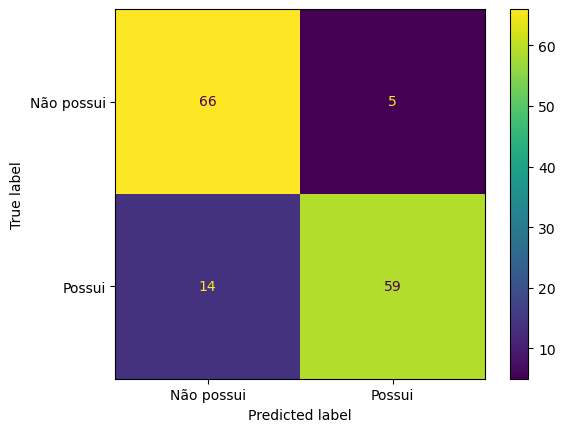

In [36]:
from sklearn.metrics import ConfusionMatrixDisplay

yPrevistoKnn = oModeloKnn.predict(xTesteNormalizado)

print("\nRelatório de Classificação:")
print(classification_report(yTeste, yPrevistoKnn))

iAcuraciaKnn = accuracy_score(yTeste, yPrevistoKnn)
print(f"Acurácia: {iAcuraciaKnn:.2f}")

print("\nMatriz de Confusão:")
print(confusion_matrix(yTeste, yPrevistoKnn))

oMatrizPlot = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(yTeste, yPrevistoKnn),display_labels = ["Não possui","Possui"])
oMatrizPlot.plot()
plt.show()

-----

# Random Forest

### Criação do modelo, definindo qual o melhor número para "n_estimators" de forma iterativa

O melhor resultado definido foi: 0.8402777777777778, para 'n_estimators' igual a  25


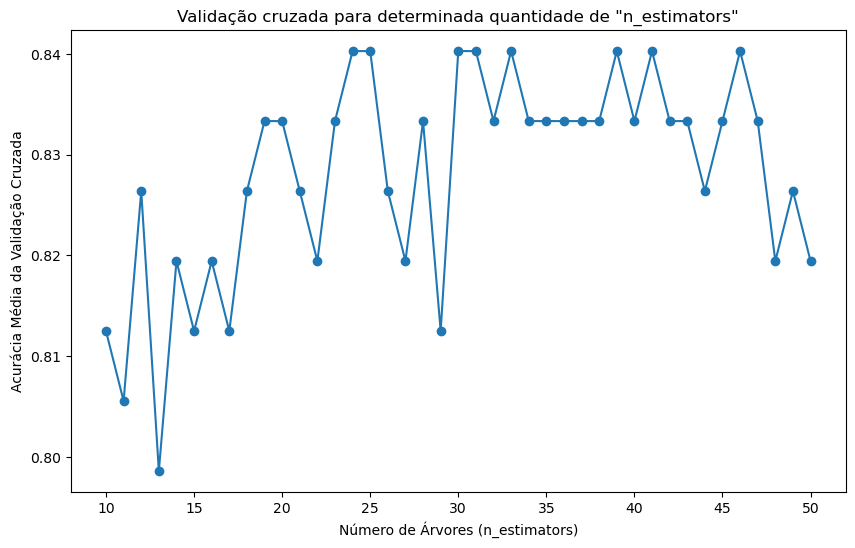

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

aEstimators = np.array([])
for iEstimators in range(10, 51):
    oRandomForest = RandomForestClassifier(n_estimators=iEstimators, random_state=42)
    oRandomForest.fit(xTreinamento, yTreinamento)
    aPontuacao = cross_val_score(oRandomForest, xTeste, yTeste, cv=3, scoring='accuracy')
    aEstimators = np.append(aEstimators, [np.mean(aPontuacao)])

print("O melhor resultado definido foi: "+str(aEstimators.max())+", para 'n_estimators' igual a  "+str(aEstimators.argmax()+11))

oRandomForest = RandomForestClassifier(n_estimators=aEstimators.argmax()+11, random_state=42)
oRandomForest.fit(xTreinamento, yTreinamento)

plt.figure(figsize=(10, 6))
plt.plot(np.arange(10, 51, 1), aEstimators, marker='o')
plt.title('Validação cruzada para determinada quantidade de "n_estimators"')
plt.xlabel('Número de Árvores (n_estimators)')
plt.ylabel('Acurácia Média da Validação Cruzada')
plt.show()

### Avaliação do modelo Random Forest


Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.79      0.90      0.84        71
           1       0.89      0.77      0.82        73

    accuracy                           0.83       144
   macro avg       0.84      0.83      0.83       144
weighted avg       0.84      0.83      0.83       144

Acurácia (Random Forest): 0.83

Matriz de Confusão:
[[64  7]
 [17 56]]


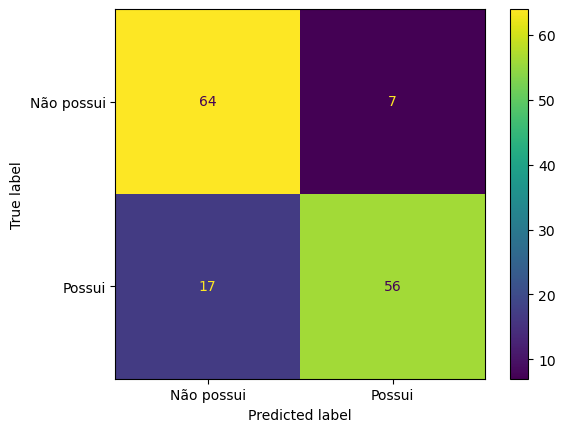

In [37]:
yPrevistoRandomForest = oRandomForest.predict(xTeste)

print("\nRelatório de Classificação:")
print(classification_report(yTeste, yPrevistoRandomForest))

iAcuraciaRandomForest = accuracy_score(yTeste, yPrevistoRandomForest)
print(f"Acurácia (Random Forest): {iAcuraciaRandomForest:.2f}")

print("\nMatriz de Confusão:")
print(confusion_matrix(yTeste, yPrevistoRandomForest))

oMatrizPlot = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(yTeste, yPrevistoRandomForest),display_labels = ["Não possui","Possui"])
oMatrizPlot.plot()
plt.show()

---

# Support Vector Machines

### Criação e treinamento do modelo, buscando o melhor valor de "C", para uma melhor acurácia, utilizando a pesquisa em grade (Grid Search)

#### Este valor corresponde ao coeficiente de regularização do modelo, sendo um parâmetro que tem como função evitar o overfitting. Controlando o "trade-off" entre ter certa devisão e classificar corretamente os pontos de treinamento

In [30]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

aValoresC           = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
aParametrosPesquisa = {'C': aValoresC, 'kernel': ['linear']}
oModeloSvm          = SVC()
aPesquisa           = GridSearchCV(oModeloSvm, aParametrosPesquisa, cv=5, scoring='accuracy')
aPesquisa.fit(xTreinamentoNormalizado, yTreinamento)

iC = aPesquisa.best_params_['C']
print(f'Melhor valor de C encontrado: {iC}')

oModeloSvm = SVC(kernel='linear', C=iC, random_state=42)
oModeloSvm.fit(xTreinamentoNormalizado, yTreinamento)

Melhor valor de C encontrado: 0.01


SVC(C=0.01, kernel='linear', random_state=42)

### Avaliação do modelo SVM


Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.80      0.90      0.85        71
           1       0.89      0.78      0.83        73

    accuracy                           0.84       144
   macro avg       0.85      0.84      0.84       144
weighted avg       0.85      0.84      0.84       144

Acurácia (SVM): 0.84

Matriz de Confusão:
[[64  7]
 [16 57]]


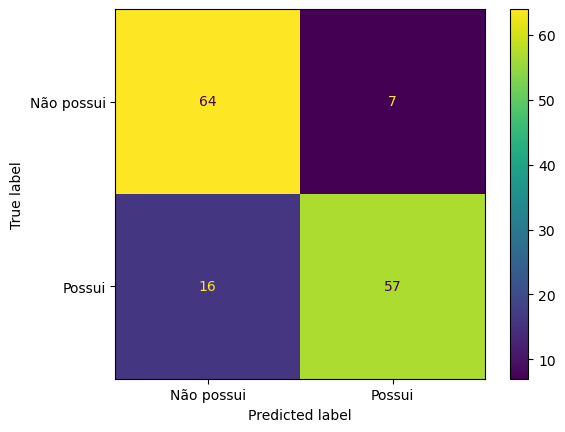

In [38]:
yPrevistoSvm = oModeloSvm.predict(xTesteNormalizado)

print("\nRelatório de Classificação:")
print(classification_report(yTeste, yPrevistoSvm))

iAcuraciaSvm = accuracy_score(yTeste, yPrevistoSvm)
print(f"Acurácia (SVM): {iAcuraciaSvm:.2f}")

print("\nMatriz de Confusão:")
print(confusion_matrix(yTeste, yPrevistoSvm))

oMatrizPlot = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(yTeste, yPrevistoSvm),display_labels = ["Não possui","Possui"])
oMatrizPlot.plot()
plt.show()


---

### Agora que estão criados os três modelos, chega o momento de comparar qual se saiu melhor para atender este contexto

### Iniciando pela comparação das acurácias

In [32]:
print(f'Acurácia KNN: {iAcuraciaKnn:.2f}')
print(f'Acurácia Random Forest: {iAcuraciaRandomForest:.2f}')
print(f'Acurácia SVM: {iAcuraciaSvm:.2f}')

Acurácia KNN: 0.87
Acurácia Random Forest: 0.83
Acurácia SVM: 0.84


### Agora, comparando os relatórios de classificação

In [39]:
from sklearn.metrics import classification_report

print("\nRelatório de Classificação - KNN:")
print(classification_report(yTeste, yPrevistoKnn, target_names=["Não possui", "Possui"]))

print("\nRelatório de Classificação - Random Forest:")
print(classification_report(yTeste, yPrevistoRandomForest, target_names=["Não possui", "Possui"]))

print("\nRelatório de Classificação - SVM:")
print(classification_report(yTeste, yPrevistoSvm, target_names=["Não possui", "Possui"]))



Relatório de Classificação - KNN:
              precision    recall  f1-score   support

  Não possui       0.82      0.93      0.87        71
      Possui       0.92      0.81      0.86        73

    accuracy                           0.87       144
   macro avg       0.87      0.87      0.87       144
weighted avg       0.87      0.87      0.87       144


Relatório de Classificação - Random Forest:
              precision    recall  f1-score   support

  Não possui       0.79      0.90      0.84        71
      Possui       0.89      0.77      0.82        73

    accuracy                           0.83       144
   macro avg       0.84      0.83      0.83       144
weighted avg       0.84      0.83      0.83       144


Relatório de Classificação - SVM:
              precision    recall  f1-score   support

  Não possui       0.80      0.90      0.85        71
      Possui       0.89      0.78      0.83        73

    accuracy                           0.84       144
   macro avg 

### Por fim, comparando as previsões

In [41]:
aPrevisoes = [
    {'Real': iReal, 'KNN': yKnn, 'RandomForest': yRandomForest, 'SVM': ySvm}
    for iReal, yKnn, yRandomForest, ySvm in zip(yTeste, yPrevistoKnn, yPrevistoRandomForest, yPrevistoSvm)
]

iAcertosKnn          = 0
iAcertosRandomForest = 0
iAcertosSvm          = 0

for aPrevisao in aPrevisoes:
    if aPrevisao['Real'] == aPrevisao['KNN']:
        iAcertosKnn += 1
    if aPrevisao['Real'] == aPrevisao['RandomForest']:
        iAcertosRandomForest += 1
    if aPrevisao['Real'] == aPrevisao['SVM']:
        iAcertosSvm += 1

print("Acertos do KNN: ", iAcertosKnn)
print("Acertos do KNN: ", iAcertosRandomForest)
print("Acertos do KNN: ", iAcertosSvm)

for aPrevisao in aPrevisoes:
    print(aPrevisao)


Acertos do KNN:  125
Acertos do KNN:  120
Acertos do KNN:  121
{'Real': 0, 'KNN': 0, 'RandomForest': 0, 'SVM': 0}
{'Real': 1, 'KNN': 1, 'RandomForest': 0, 'SVM': 0}
{'Real': 1, 'KNN': 1, 'RandomForest': 1, 'SVM': 1}
{'Real': 0, 'KNN': 0, 'RandomForest': 0, 'SVM': 0}
{'Real': 0, 'KNN': 0, 'RandomForest': 0, 'SVM': 0}
{'Real': 1, 'KNN': 1, 'RandomForest': 1, 'SVM': 1}
{'Real': 0, 'KNN': 0, 'RandomForest': 0, 'SVM': 0}
{'Real': 1, 'KNN': 0, 'RandomForest': 0, 'SVM': 0}
{'Real': 1, 'KNN': 1, 'RandomForest': 1, 'SVM': 1}
{'Real': 0, 'KNN': 0, 'RandomForest': 0, 'SVM': 0}
{'Real': 0, 'KNN': 1, 'RandomForest': 1, 'SVM': 1}
{'Real': 0, 'KNN': 0, 'RandomForest': 0, 'SVM': 0}
{'Real': 0, 'KNN': 1, 'RandomForest': 0, 'SVM': 1}
{'Real': 0, 'KNN': 0, 'RandomForest': 0, 'SVM': 0}
{'Real': 0, 'KNN': 0, 'RandomForest': 0, 'SVM': 0}
{'Real': 0, 'KNN': 0, 'RandomForest': 0, 'SVM': 0}
{'Real': 0, 'KNN': 0, 'RandomForest': 0, 'SVM': 0}
{'Real': 1, 'KNN': 1, 'RandomForest': 1, 'SVM': 1}
{'Real': 1, 'KNN': 

---

# Conforme o visto até aqui, para a classificação binária, os modelos se mostraram bastante parecidos para este contexto e este conjunto de dados. Contudo, mesmo com os valores otimizados para cada modelo (como o número de K para KNN, número de árvores para Random Forest e C para SVM), o que se saiu melhor nos resultados é o KNN. Classificando os pacientes se possuem ou não uma doença cardíaca.